In [23]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import os
import random
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

from IPython.display import SVG , Image
import tensorflow as tf
print("TF version:",tf.__version__)

TF version: 2.15.0


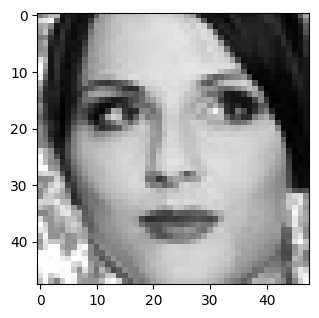

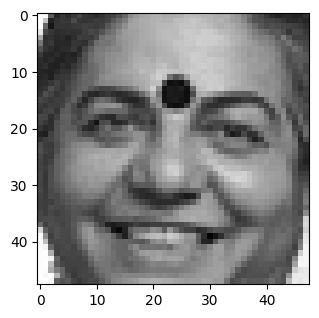

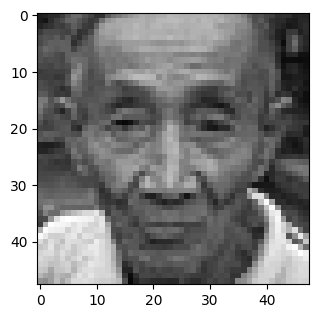

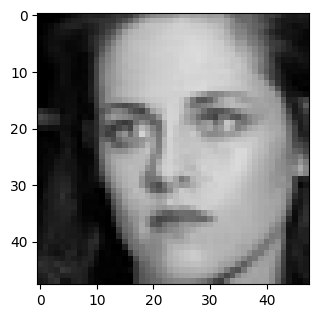

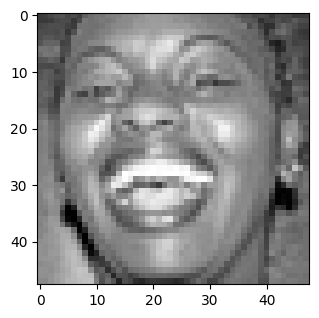

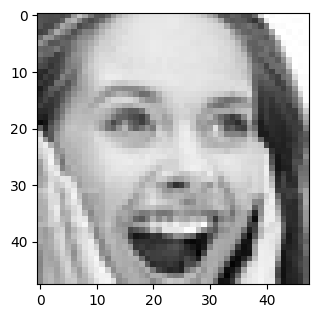

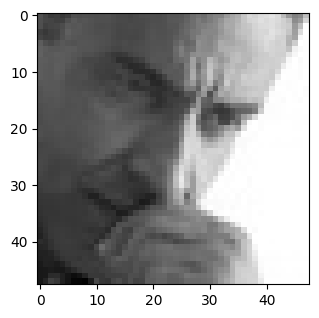

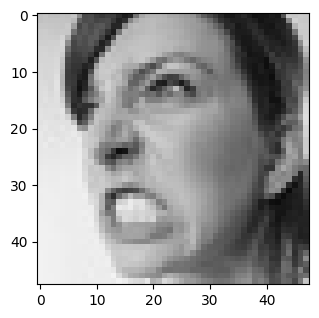

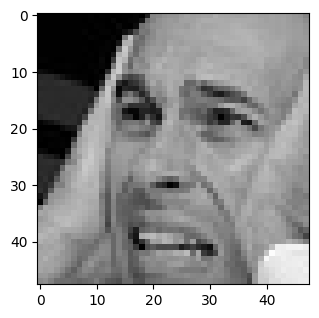

In [24]:
images=glob("/kaggle/input/fer2013/train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis

**Pre-processing Data for training**


In [25]:
img_size = 48
batch_size = 60

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(
    "/kaggle/input/fer2013/train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    batch_size=batch_size
)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory(
    "/kaggle/input/fer2013/test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    batch_size=batch_size
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**


In [26]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3,3),padding='same')(x)
    x = Dropout(0.25)(x)
    return x


In [27]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [28]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 128, (5, 5))
    conv_3 = Convolution(conv_2, 512, (3, 3))
    conv_4 = Convolution(conv_3, 512, (3, 3))


    flatten = Flatten()(conv_4)

    dense_1 = Dense_f(flatten, 256)
    dense_2=Dense_f(dense_1,512)

    output = Dense(7, activation="softmax")(dense_2)
    model = Model(inputs=[inputs], outputs=[output])
    
    opt=Adam(learning_rate=0.0005)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [29]:
model= model_fer((48,48,1))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,32

 Total params: 3,430,151 (13.08 MB)

 Trainable params: 3,426,183 (13.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

**Initializing model**


In [30]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001)
callbacks = [checkpoint,reduce_lr]



**TRAINING MODEL**


In [31]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.2105 - loss: 2.0468
Epoch 1: saving model to model_weights.weights.h5
478/478 ━━━━━━━━━━━━━━━━━━━━ 448s 923ms/step - accuracy: 0.2106 - loss: 2.0466 - val_accuracy: 0.3204 - val_loss: 1.7459 - learning_rate: 5.0000e-04
Epoch 2/15
  1/478 ━━━━━━━━━━━━━━━━━━━━ 6:20 798ms/step - accuracy: 0.3167 - loss: 1.8286

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.weights.h5
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3167 - loss: 1.8286 - val_accuracy: 0.3947 - val_loss: 1.7900 - learning_rate: 5.0000e-04
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.3628 - loss: 1.6384
Epoch 3: saving model to model_weights.weights.h5
478/478 ━━━━━━━━━━━━━━━━━━━━ 410s 857ms/step - accuracy: 0.3628 - loss: 1.6383 - val_accuracy: 0.4293 - val_loss: 1.4846 - learning_rate: 5.0000e-04
Epoch 4/15
  1/478 ━━━━━━━━━━━━━━━━━━━━ 7:56 998ms/step - accuracy: 0.4500 - loss: 1.4587
Epoch 4: saving model to model_weights.weights.h5
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.4500 - loss: 1.4587 - val_accuracy: 0.5263 - val_loss: 1.1677 - learning_rate: 5.0000e-04
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.4277 - loss: 1.4818
Epoch 5: saving model to model_weights.weights.h5
478/478 ━━━━━━━━━━━━━━━━━━━━ 418s 874ms/step - accuracy: 0.4277 - loss: 1.4818 - val_accur

**MODEL EVALUATION**

In [32]:
model.evaluate(validation_generator)

120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.5154 - loss: 1.2422


[1.2577260732650757, 0.5136528015136719]

**Plotting Loss**

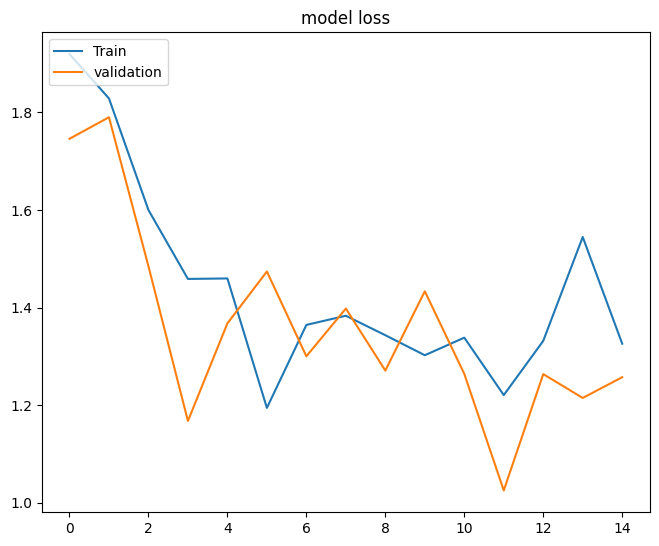

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Train','validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95,left=0.0,hspace=0.25,wspace=0.35)

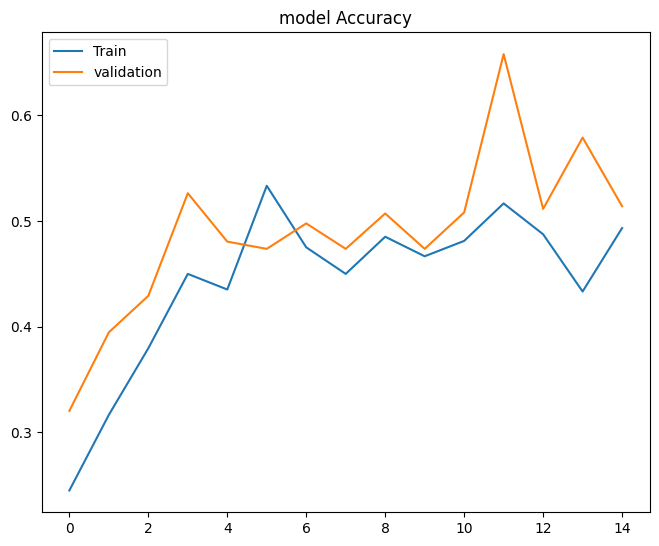

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.legend(['Train','validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**


In [35]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)